In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import  mean_absolute_error


Датасет, полученный с Kaggle (https://www.kaggle.com/rtatman/us-candy-production-by-month ) содержит данные об уровне производства конфет в США с января 1972 по август 2017 года.

Каждая запись характеризуется двумя значениями:

observation_date - дата в формате YYYY-MM-DD
IPG3113N - индустриальный продуктовый индекс. Это универсальный индекс уровня производства, который измеряется как % от уровня производста 2012 года.
Рассматривается задача прогнозирования будущего уровня производства конфет по имеющимся предыдущим наблюдениям. В качестве горизонта прогнозирования выбран временной интервал в 24 месяца.

In [4]:
df = pd.read_csv('candy_production.csv')

In [60]:
df.head()

,IPG3113N
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


приведём данные к более удобному виду дата-время и сделаем даты индексами.

In [5]:
df.index = pd.to_datetime(df['observation_date'], dayfirst=True )
df['value'] = df['IPG3113N']
df = df.drop(['observation_date', 'IPG3113N'], axis=1)

In [6]:
df.head()

,value
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


Теперь проверим данные на наличие пропусков .

In [7]:
df.isnull().sum(axis=0)

value    0
dtype: int64

Порсмотрим на гистограмму распределения выпуска

<Axes: xlabel='value', ylabel='Density'>

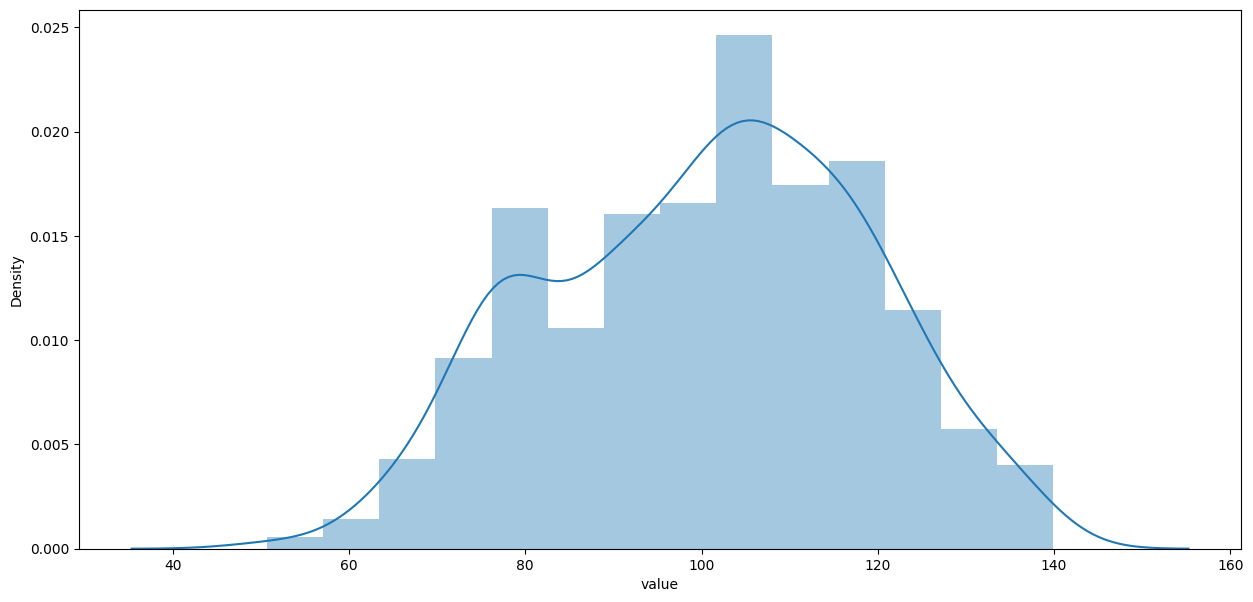

In [8]:
sns.distplot(df['value'])

посмотрим на график самого временного ряда

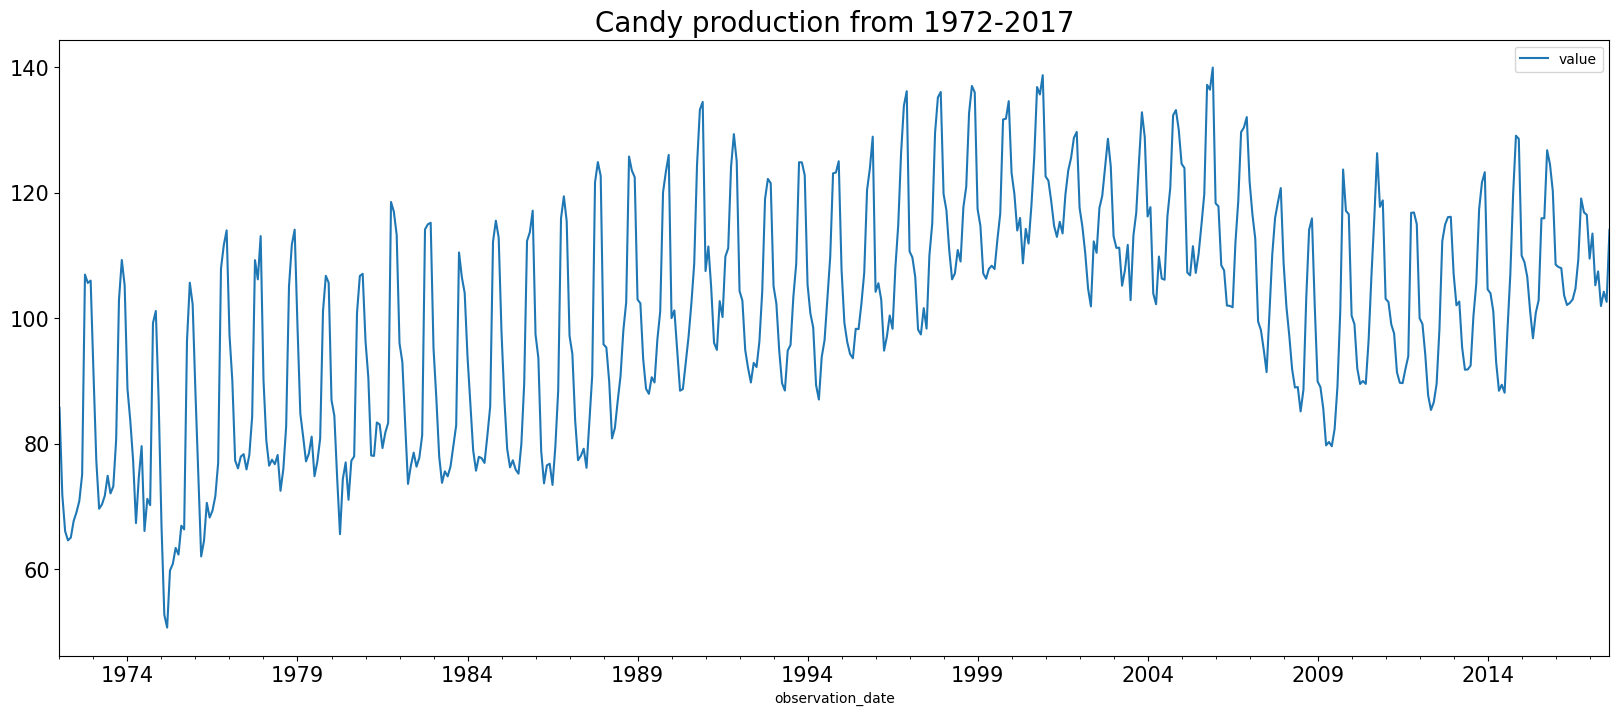

In [13]:
df.plot(figsize=(20, 8), fontsize=15)
plt.title('Сandy production from 1972-2017', fontsize=20)
plt.show()

Посмотрим, что нам даст группировка наблюдений по месяцам и годам.


In [14]:
df['year'] = df.index.year
df['month'] = df.index.month
df['weekday'] = df.index.weekday

In [15]:
df.head()

,value,year,month,weekday
observation_date,,,,
1972-01-01,85.6945,1972,1,5
1972-02-01,71.8200,1972,2,1
1972-03-01,66.0229,1972,3,2
1972-04-01,64.5645,1972,4,5
1972-05-01,65.0100,1972,5,0


<Axes: xlabel='year', ylabel='value'>

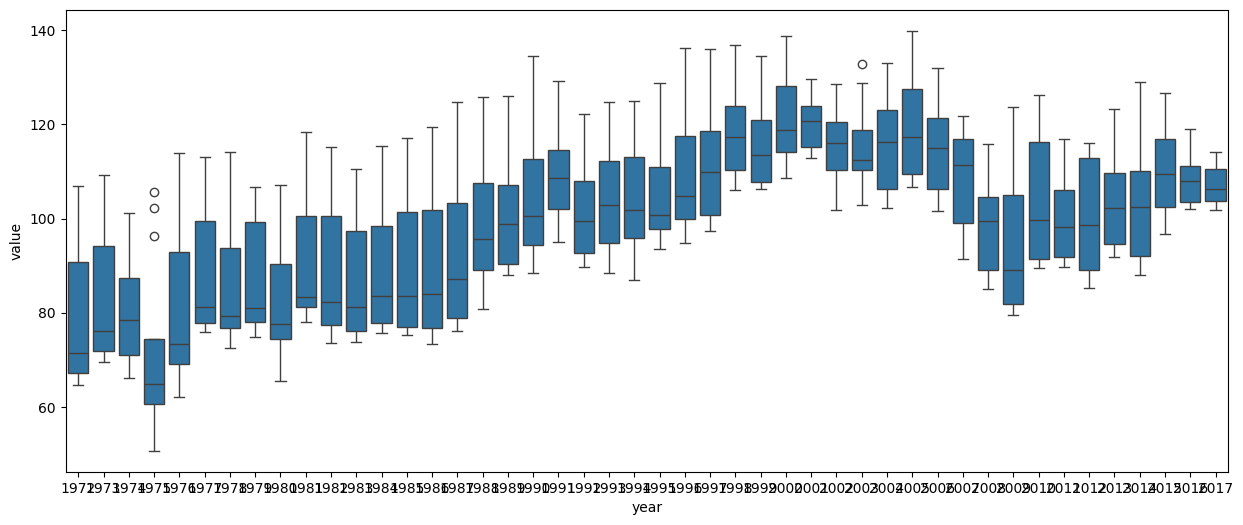

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='year', y='value', data=df)

создаем датафрейм для обучения

In [18]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [19]:
dataset = df['value'].values

In [20]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset1 = scaler.fit_transform(dataset.reshape(-1, 1))
len(dataset1)

548

In [21]:
# Разделим выборку
train_size = int(len(dataset1) * 0.9)
test_size = len(dataset1) - train_size
train, test = dataset1[0:train_size], dataset1[train_size:len(dataset)]
print(len(train), len(test))

493 55


In [22]:
def create_dataset(dataset2, look_back):
  dataX=[]
  dataY =[]
  for i in range(len(dataset2)-look_back):
    a = dataset2[i:(i+look_back)]
    dataX.append(a)
    dataY.append(dataset2[i + look_back])
  return np.array(dataX), np.array(dataY)

In [23]:
look_back=3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [25]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=35, batch_size=1, verbose=2)

Epoch 1/35
490/490 - 4s - loss: 0.0873 - 4s/epoch - 8ms/step
Epoch 2/35
490/490 - 1s - loss: 0.0222 - 1s/epoch - 2ms/step
Epoch 3/35
490/490 - 1s - loss: 0.0198 - 965ms/epoch - 2ms/step
Epoch 4/35
490/490 - 1s - loss: 0.0176 - 978ms/epoch - 2ms/step
Epoch 5/35
490/490 - 1s - loss: 0.0159 - 950ms/epoch - 2ms/step
Epoch 6/35
490/490 - 1s - loss: 0.0141 - 951ms/epoch - 2ms/step
Epoch 7/35
490/490 - 1s - loss: 0.0125 - 932ms/epoch - 2ms/step
Epoch 8/35
490/490 - 1s - loss: 0.0114 - 923ms/epoch - 2ms/step
Epoch 9/35
490/490 - 1s - loss: 0.0105 - 946ms/epoch - 2ms/step
Epoch 10/35
490/490 - 1s - loss: 0.0098 - 930ms/epoch - 2ms/step
Epoch 11/35
490/490 - 1s - loss: 0.0096 - 1s/epoch - 2ms/step
Epoch 12/35
490/490 - 1s - loss: 0.0092 - 1s/epoch - 3ms/step
Epoch 13/35
490/490 - 1s - loss: 0.0091 - 1s/epoch - 2ms/step
Epoch 14/35
490/490 - 1s - loss: 0.0092 - 932ms/epoch - 2ms/step
Epoch 15/35
490/490 - 1s - loss: 0.0090 - 922ms/epoch - 2ms/step
Epoch 16/35
490/490 - 1s - loss: 0.0089 - 953ms/e

In [26]:
from sklearn.metrics import mean_squared_error
from math import *
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

2/2 [==============================] - 0s 5ms/step


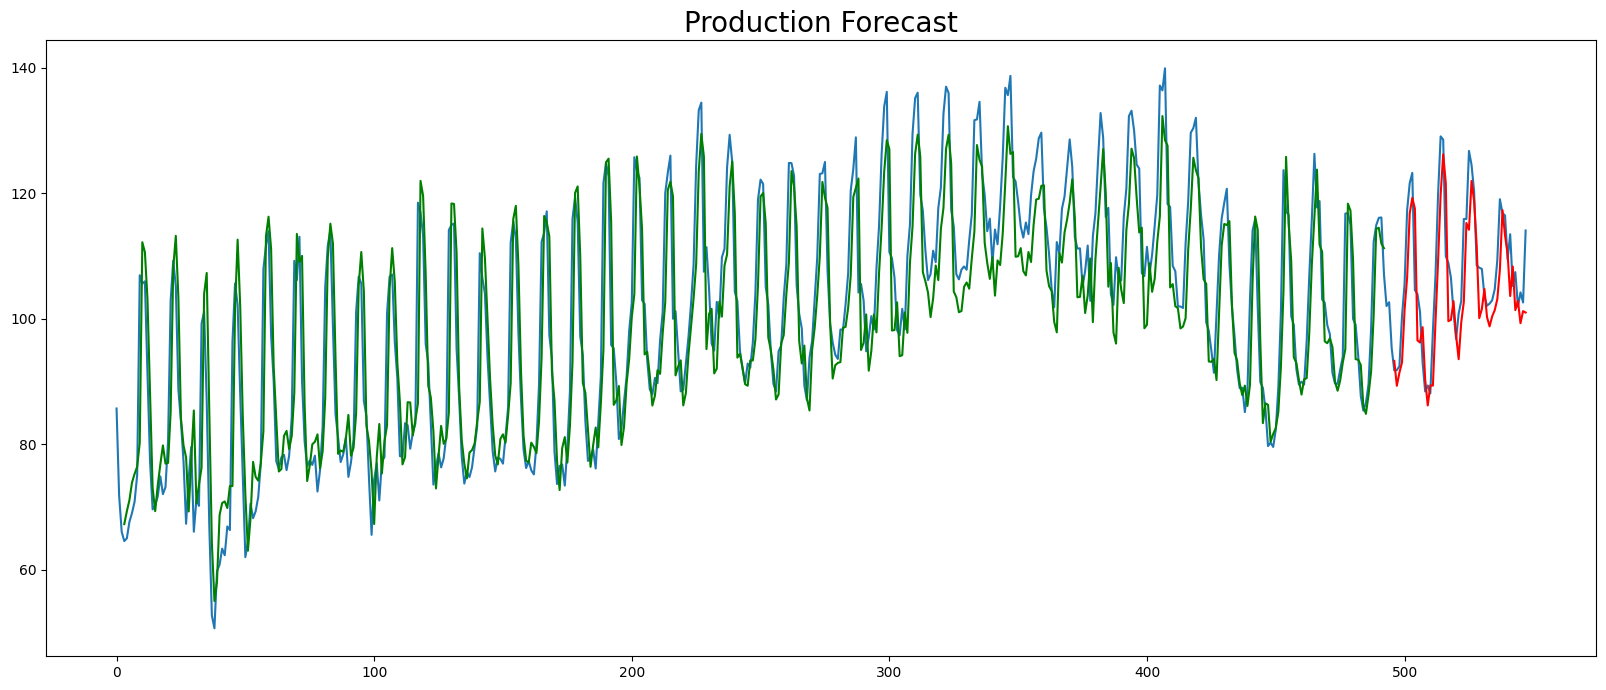

In [39]:
plt.figure(figsize=(20, 8))
trainPredictPlot = np.empty_like(dataset1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+2*look_back:len(dataset1), :] = testPredict

plt.title('Production Forecast', fontsize=20)
plt.plot(scaler.inverse_transform(dataset1))
plt.plot(trainPredictPlot, color='green')
plt.plot(testPredictPlot,color='red')
plt.show()

In [40]:
df = pd.read_csv('candy_production.csv', index_col='observation_date', parse_dates=True)

# масштабировать данные в диапазоне от 0 до 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['IPG3113N'].values.reshape(-1,1))

# разделить данные на обучающий и тестовый наборы
train_size = int(len(scaled_data) * 0.7)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# функция для создания последовательностей модели LSTM
def create_sequences(data, look_back=12):
    X, Y = [], []
    for i in range(len(data)-look_back):
        X.append(data[i:i+look_back])
        Y.append(data[i+look_back])
    return np.array(X), np.array(Y)

# создавать последовательности для обучающего и тестового наборов
trainX, trainY = create_sequences(train_data)
testX, testY = create_sequences(test_data)

# измение формы входных данных, чтобы они были совместимы с моделью LSTM
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# создание LSTM-модели
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(trainX.shape[1], 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [41]:
# подгонка модели по данным обучения
model.fit(trainX, trainY, epochs=50, batch_size=20)

# делать прогнозы на обучающем и тестовом множествах
train_predictions = scaler.inverse_transform(model.predict(trainX))
test_predictions = scaler.inverse_transform(model.predict(testX))

Epoch 1/50
19/19 [==============================] - 3s 13ms/step - loss: 0.1589
Epoch 2/50
19/19 [==============================] - 0s 14ms/step - loss: 0.0354
Epoch 3/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0290
Epoch 4/50
19/19 [==============================] - 0s 15ms/step - loss: 0.0295
Epoch 5/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0281
Epoch 6/50
19/19 [==============================] - 0s 13ms/step - loss: 0.0279
Epoch 7/50
19/19 [==============================] - 0s 18ms/step - loss: 0.0256
Epoch 8/50
19/19 [==============================] - 0s 22ms/step - loss: 0.0241
Epoch 9/50
19/19 [==============================] - 0s 21ms/step - loss: 0.0218
Epoch 10/50
19/19 [==============================] - 0s 21ms/step - loss: 0.0178
Epoch 11/50
19/19 [==============================] - 0s 21ms/step - loss: 0.0143
Epoch 12/50
19/19 [==============================] - 0s 22ms/step - loss: 0.0099
Epoch 13/50
19/19 [==================

In [42]:
# создать долгосрочный прогноз на следующие 3 года
last_sequence = train_data[-12:]
long_term_forecast = []
current_month = df.index[-1]
for i in range(37):
    seq = last_sequence.reshape((1, 12, 1))
    prediction = model.predict(seq)
    long_term_forecast.append(prediction[0][0])
    last_sequence = np.append(last_sequence, prediction[0])[1:]
    current_month = current_month + pd.DateOffset(months=1)

# вернуть прогнозируемые значения к исходному масштабу
long_term_forecast = scaler.inverse_transform(np.array(long_term_forecast).reshape(-1,1))

1/1 [==============================] - 0s 23ms/step


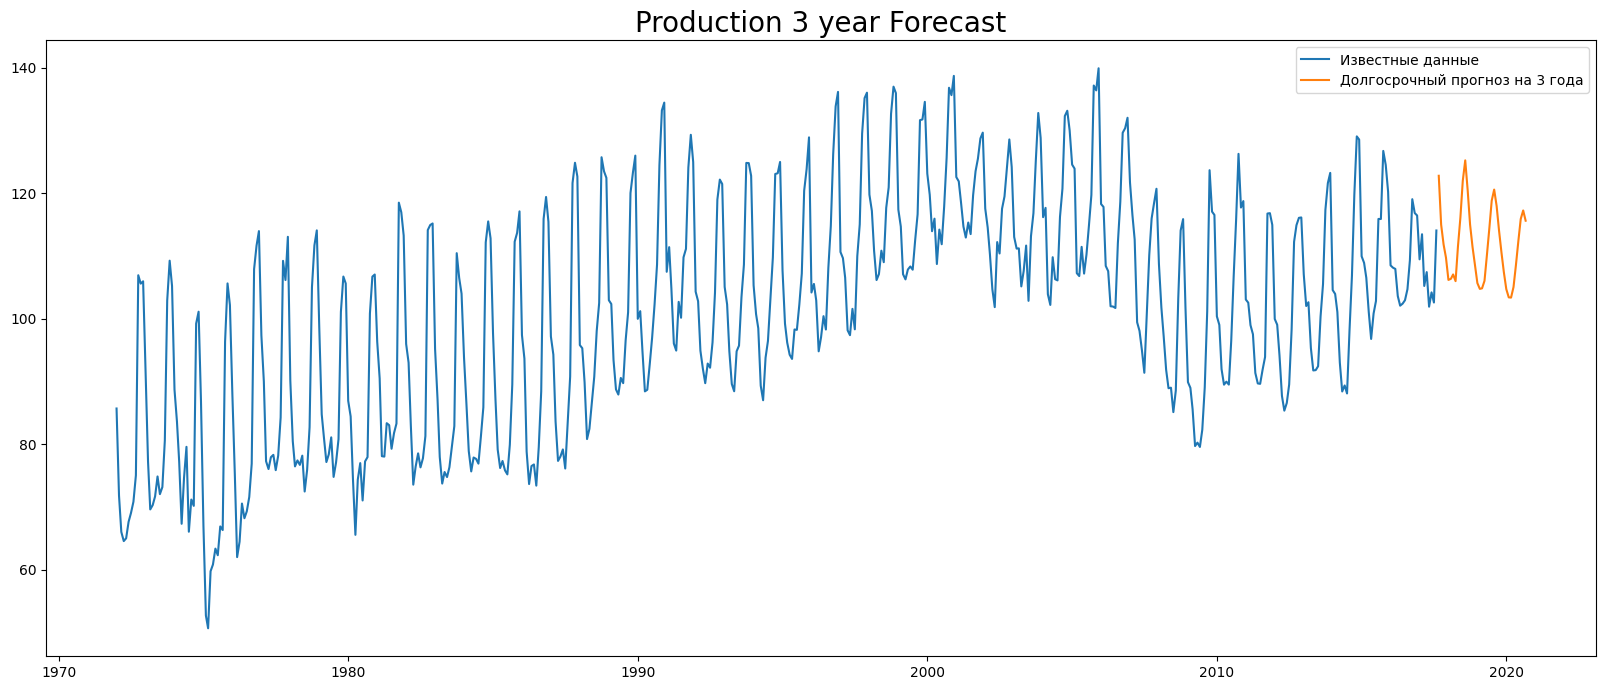

In [56]:
plt.figure(figsize=(20, 8))
plt.title('Production 3 year Forecast', fontsize=20)
plt.plot(df.index, df['IPG3113N'], label='Известные данные')
plt.plot(pd.date_range(start=df.index[-1], periods=37, freq='M')[:len(long_term_forecast)], long_term_forecast, label='Долгосрочный прогноз на 3 года')
plt.legend()
plt.show()